Autor: Martín de las Heras

## Práctica 2

En primer lugar, importamos todas las librerías que vamos a necesitar:

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

### Ejercicio 1

Un distribuidor de cervezas especiales 
está interesado en el efecto del precio de la botella de PARADISE PREMIUM BEER sobre la cantidad demandada de botellas al mes. Por esta razón, se han recogido los datos de 10 meses seleccionados al azar sobre las variables X: precio fijado por el distribuidor, en euros, para la botella de PPB durante un mes e Y: cantidad demandada de botellas de PPB, en unidades de millar, en el mismo mes:

In [3]:
X = [1.35, 0.95, 1.1, 1.6, 1.25, 0.8, 1, 1.5, 1.15, 1.45]
Y = [33.2, 38.9, 36.3, 27.4, 33.7, 39.8, 37.2, 29.6, 36.5, 30.7]

**a)** ¿Por qué está situación se puede considerar un caso particular del modelo 
AS-RLS?

Porque se trata de una relación lineal entre la variable X y la variable Y, de manera que estimando la pendiente de la recta y su punto de intercepción con el eje y se puede predecir con un cierto margen de error las ventas en el futuro en base al precio de venta.

**b)** Dibuja el diagrama de dispersión con la recta de regresión ajustada. 
Extraer conclusiones. 

C:\Users\Marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     113.1
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           0.000127
Time:                        18:13:29   Log-Likelihood:                -8.4287
No. Observations:                   7   AIC:                             20.86
Df Residuals:                       5   BIC:                             20.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.0103      1.709     31.019      0.0

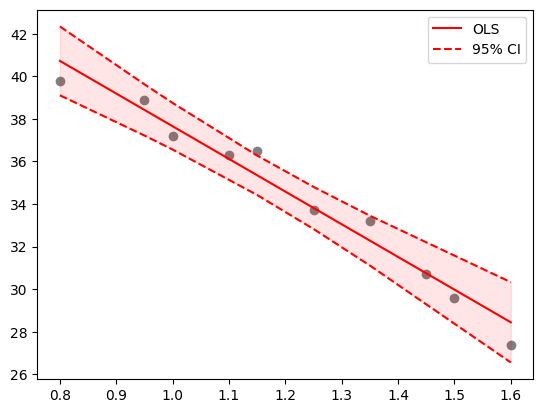

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                        # train_size   = 0.8,
                                        random_state = 1234
                                    )

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())
modelo.conf_int(alpha=0.05)

# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog=X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
plt.scatter(X, Y, marker='o', color = "gray")
plt.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS", color='red')
plt.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
plt.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
plt.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1, color='red')
plt.legend();

Podemos ver claramente que se trata de una relación inversa, donde a mayor precio de la botella, menos cantidad se vende. Esto se ve ya que la recta tiene una pendiente descendiente.

**c)** Obtener los residuos y proceder a un análisis gráfico de los mismos. 
Extraer conclusiones sobre el modelo AS-RLS basado en normalidad, aleatoriedad y homocedasticidad de los errores. 


C:\Users\Marti\AppData\Local\Temp\ipykernel_7008\99266934.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)],
C:\Users\Marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


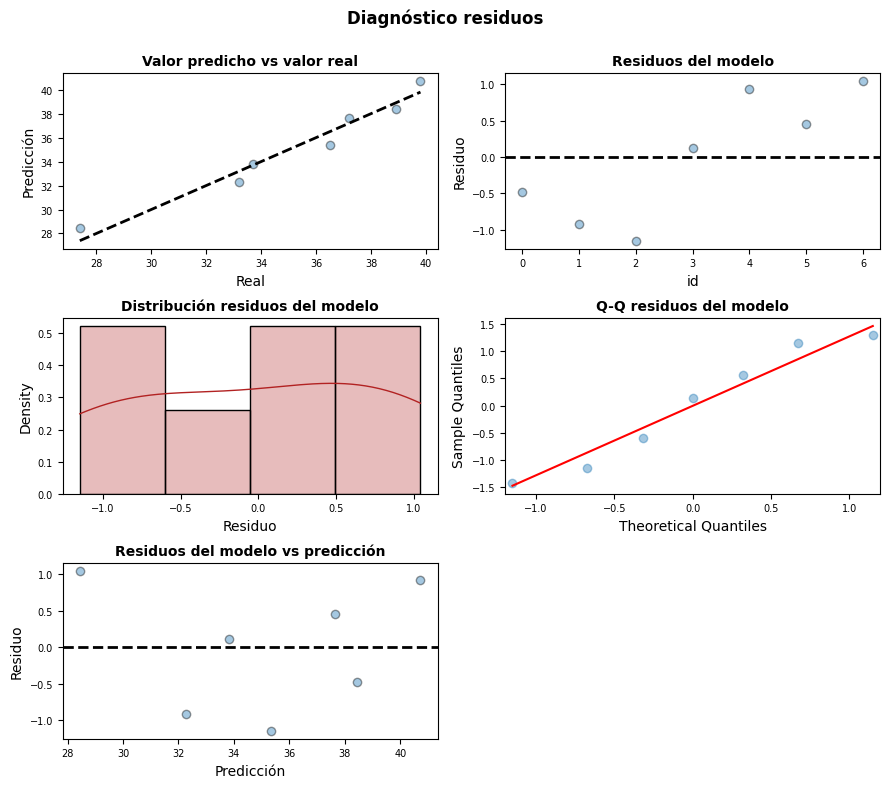

In [5]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================

prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - Y_train

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(Y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(Y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

Es difícil hacer un diagnóstico debido a la poca cantidad de muestras que tenemos, de todas formas se puede ver que en cierta medida se están distribuyendo de manera aleatoria en torno al cero los residuos. Lo mismo se puede decir respecto a la variabilidad respecto al eje.

Esto nos deja que es posible una falta de homocedasticidd y de distribución normal.

**d)** ¿Qué información se puede obtener sobre la demanda de botellas de PPB 
a un 95 % cuando para los meses de Diciembre y Enero el distribuidor se 
plantea fijar un precio de la botella de 1.3 y 0.9 euros respectivamente? 

In [6]:
enero = [1.,1.3]
diciembre = [1.,0.9]
X_train_d = [enero, diciembre]
predicciones_train_d = modelo.get_prediction(exog=X_train_d).summary_frame(alpha=0.05)
predicciones_train_d

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,33.049346,0.415542,31.981163,34.117530,30.373368,35.725324
1,39.191176,0.517633,37.860559,40.521794,36.400050,41.982303


Aquí vemos que para enero (columna 0), se estima que la demanda de botellas estará entre 31981 y 34117 botellas a un 95% de probabilidad, y para diciembre (columna 1) su rango será de 37860 a 40521 también para un 95% de probabilidad.

**e)** Ahora el distribuidor está interesado en fijar, para los próximos 6 meses, el precio de la botella que le proporcione unos ingresos máximos. Obtener una variable que recoja los ingresos durante los 10 meses analizados, siendo Z los ingresos en miles de euros para un mes en el que el precio de la botella de PPB es X.

Para ello, calculamos cuál ha sido el mes que más ingresos se ha tenido, calculando lo mismo como precio*botellas:

In [7]:
Z = np.multiply(X, Y)
Z

array([44.82 , 36.955, 39.93 , 43.84 , 42.125, 31.84 , 37.2  , 44.4  ,
       41.975, 44.515])

**f)** Representar el diagrama de dispersión con la recta de regresión ajustada para Z en función de X. Calcular e interpretar las diferentes sumas de cuadrados y el coeficiente de determinación lineal entre Z y X. Extraer conclusiones.

C:\Users\Marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     21.90
Date:                Fri, 10 Nov 2023   Prob (F-statistic):            0.00544
Time:                        18:13:31   Log-Likelihood:                -14.266
No. Observations:                   7   AIC:                             32.53
Df Residuals:                       5   BIC:                             32.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.8264      3.934      5.548      0.0

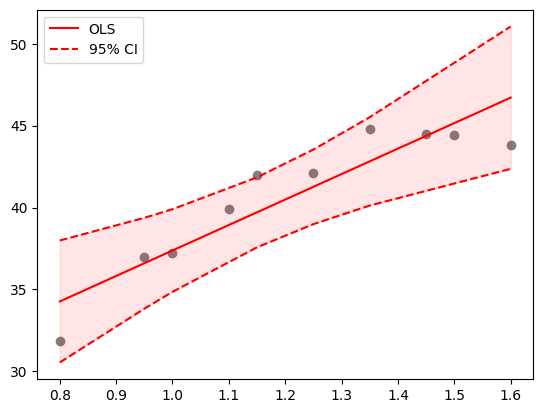

In [8]:
# División de los datos en train y test
# ==============================================================================
X_train, X_test, Z_train, Z_test = train_test_split(X, Z,
                                        # train_size   = 0.8,
                                        random_state = 1234
                                    )

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=Z_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())
modelo.conf_int(alpha=0.05)

# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
plt.scatter(X, Z, marker='o', color = "gray")
plt.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS", color='red')
plt.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
plt.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
plt.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1, color='red')
plt.legend();

Vemos que el coeficiente de determinación lineal entre Z y X es cercano a 1, por lo que podemos deducir que la variable X explica bien los resultados de la variable Z. Pero, cabe destacar que el número es notablemente más bajo que el anterior, por no decir que cualitativamente se ve un desajuste de la recta respecto a la muestra.

**g)** Obtener la parábola de regresión mínimo-cuadrática de Z sobre X. Calcular e interpretar las diferentes sumas de cuadrados y el coeficiente de determinación parabólica entre Z y X.

C:\Users\Marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     95.93
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           0.000417
Time:                        18:13:31   Log-Likelihood:                -6.5358
No. Observations:                   7   AIC:                             19.07
Df Residuals:                       4   BIC:                             18.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3391      2.268     -2.354      0.0

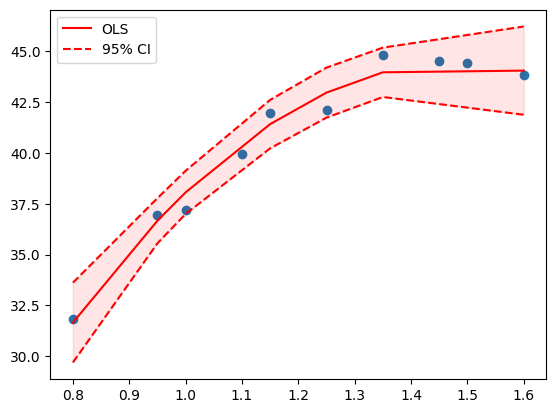

In [9]:
polynomial_features= PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(X_train)

modelo = sm.OLS(endog=Z_train, exog=xp,).fit()
print(modelo.summary())
predicciones = modelo.get_prediction(exog=xp).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones = predicciones.sort_values('x')
modelo.conf_int(alpha=0.05)

plt.scatter(X,Z)
plt.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS", color='red')
plt.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
plt.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
plt.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1, color='red')
plt.legend();

Aquí podemos ver que estas sumas de cuadrados hacen que nuestra predicción se aproxime mucho más a la realidad del modelo, al igual que un p-valor bajo.

**h)** Calcular para los próximos seis meses el precio de la botella que proporcione al distribuidor de unos ingresos máximos. Con dicho precio

a. ¿Cuál será la predicción y el intervalo de predicción al 95% de ingresos para cada mes?

b. ¿Qué información se puede obtener sobre los ingresos medios de un mes al 95% de confianza?

In [10]:
predicciones

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,x
4,31.651762,0.706650,29.689787,33.613738,28.658340,34.645185,0.80
0,36.662489,0.399902,35.552182,37.772796,34.143757,39.181221,0.95
5,38.057135,0.382617,36.994820,39.119449,35.559187,40.555082,1.00
2,41.414283,0.429306,40.222339,42.606228,38.858513,43.970054,1.15
3,42.963392,0.443471,41.732118,44.194666,40.389044,45.537740,1.25
1,43.961308,0.437293,42.747189,45.175427,41.395121,46.527495,1.35
6,44.044631,0.781848,41.873872,46.215390,40.910397,47.178865,1.60


Podemos ver que el valor máximo de la predicción corresponde al precio de 1.60, por lo que ese sería el precio que proporcionaría un beneficio máximo al cliente.

a. La predicción entonces sería de 44.044, con un intervalo de confianza del 95% [41.873872, 46.215390]

b. Podemos ver que tiene una cota inferior más baja que la cota inferior de otras predicciones, es decir, que su error estándar es mayor, por lo que podría escogerse otro valor para minimizar el riesgo. De todas formas, esta predicción mejoraría con una cantidad mayor de datos.

### Ejercicio 2

INMOCASA es una empresa reconocida de compra-venta y alquiler de viviendas. El fichero Ventapisos.xlsx contiene información sobre 72 inmuebles y una serie de variables sobre los mismos como:
* Y: precio (en euros), 
* X1: superficie (en metros cuadrados), 
* X2: distancia al centro, en km 
* X3: distancia a transporte público, en metros 
* X4: Zona 
* X5: Piscina (variable binaria donde 0 (1) es que el piso NO (SI) tiene piscina) 
* X6: Garaje (variable binaria donde 0 (1) es que el piso NO (SI) tiene plaza de garaje) 
* X7: Planta (variable discreta que indica la planta del edificio en la que se encuentra 
el piso) 
* X8: numhab (variable discreta que indica el número de habitaciones que tiene la 
vivienda) 
* X9: numbaños (variable discreta que indica el número de baños que tiene la 
vivienda) 

**a)** Dibuja el gráfico matricial de las 10 variables. Calcula la matriz de 
correlaciones. Extrae conclusiones. 


In [11]:
ventapisos = pd.read_excel('Ventapisos.xlsx')
ventapisos

,Numpiso,zona,piscina,garage,precio,superficie,planta,distcentro,disttransppub,numhab,numbaños
0,1,1,0,0,235000,65,2,0.0,20,2,1
1,2,1,0,0,360000,70,10,0.0,44,3,1
2,3,1,0,0,450760,94,6,0.0,34,3,1
3,4,1,0,0,265000,55,3,0.0,15,2,1
4,5,1,0,0,686400,150,9,0.0,26,3,2
...,...,...,...,...,...,...,...,...,...,...,...
67,68,7,0,1,372000,118,5,22.7,840,3,1
68,69,7,1,1,438740,110,2,12.9,112,3,2
69,70,7,1,1,438738,140,2,12.4,313,4,2
70,71,7,1,1,870000,240,4,13.9,624,3,2


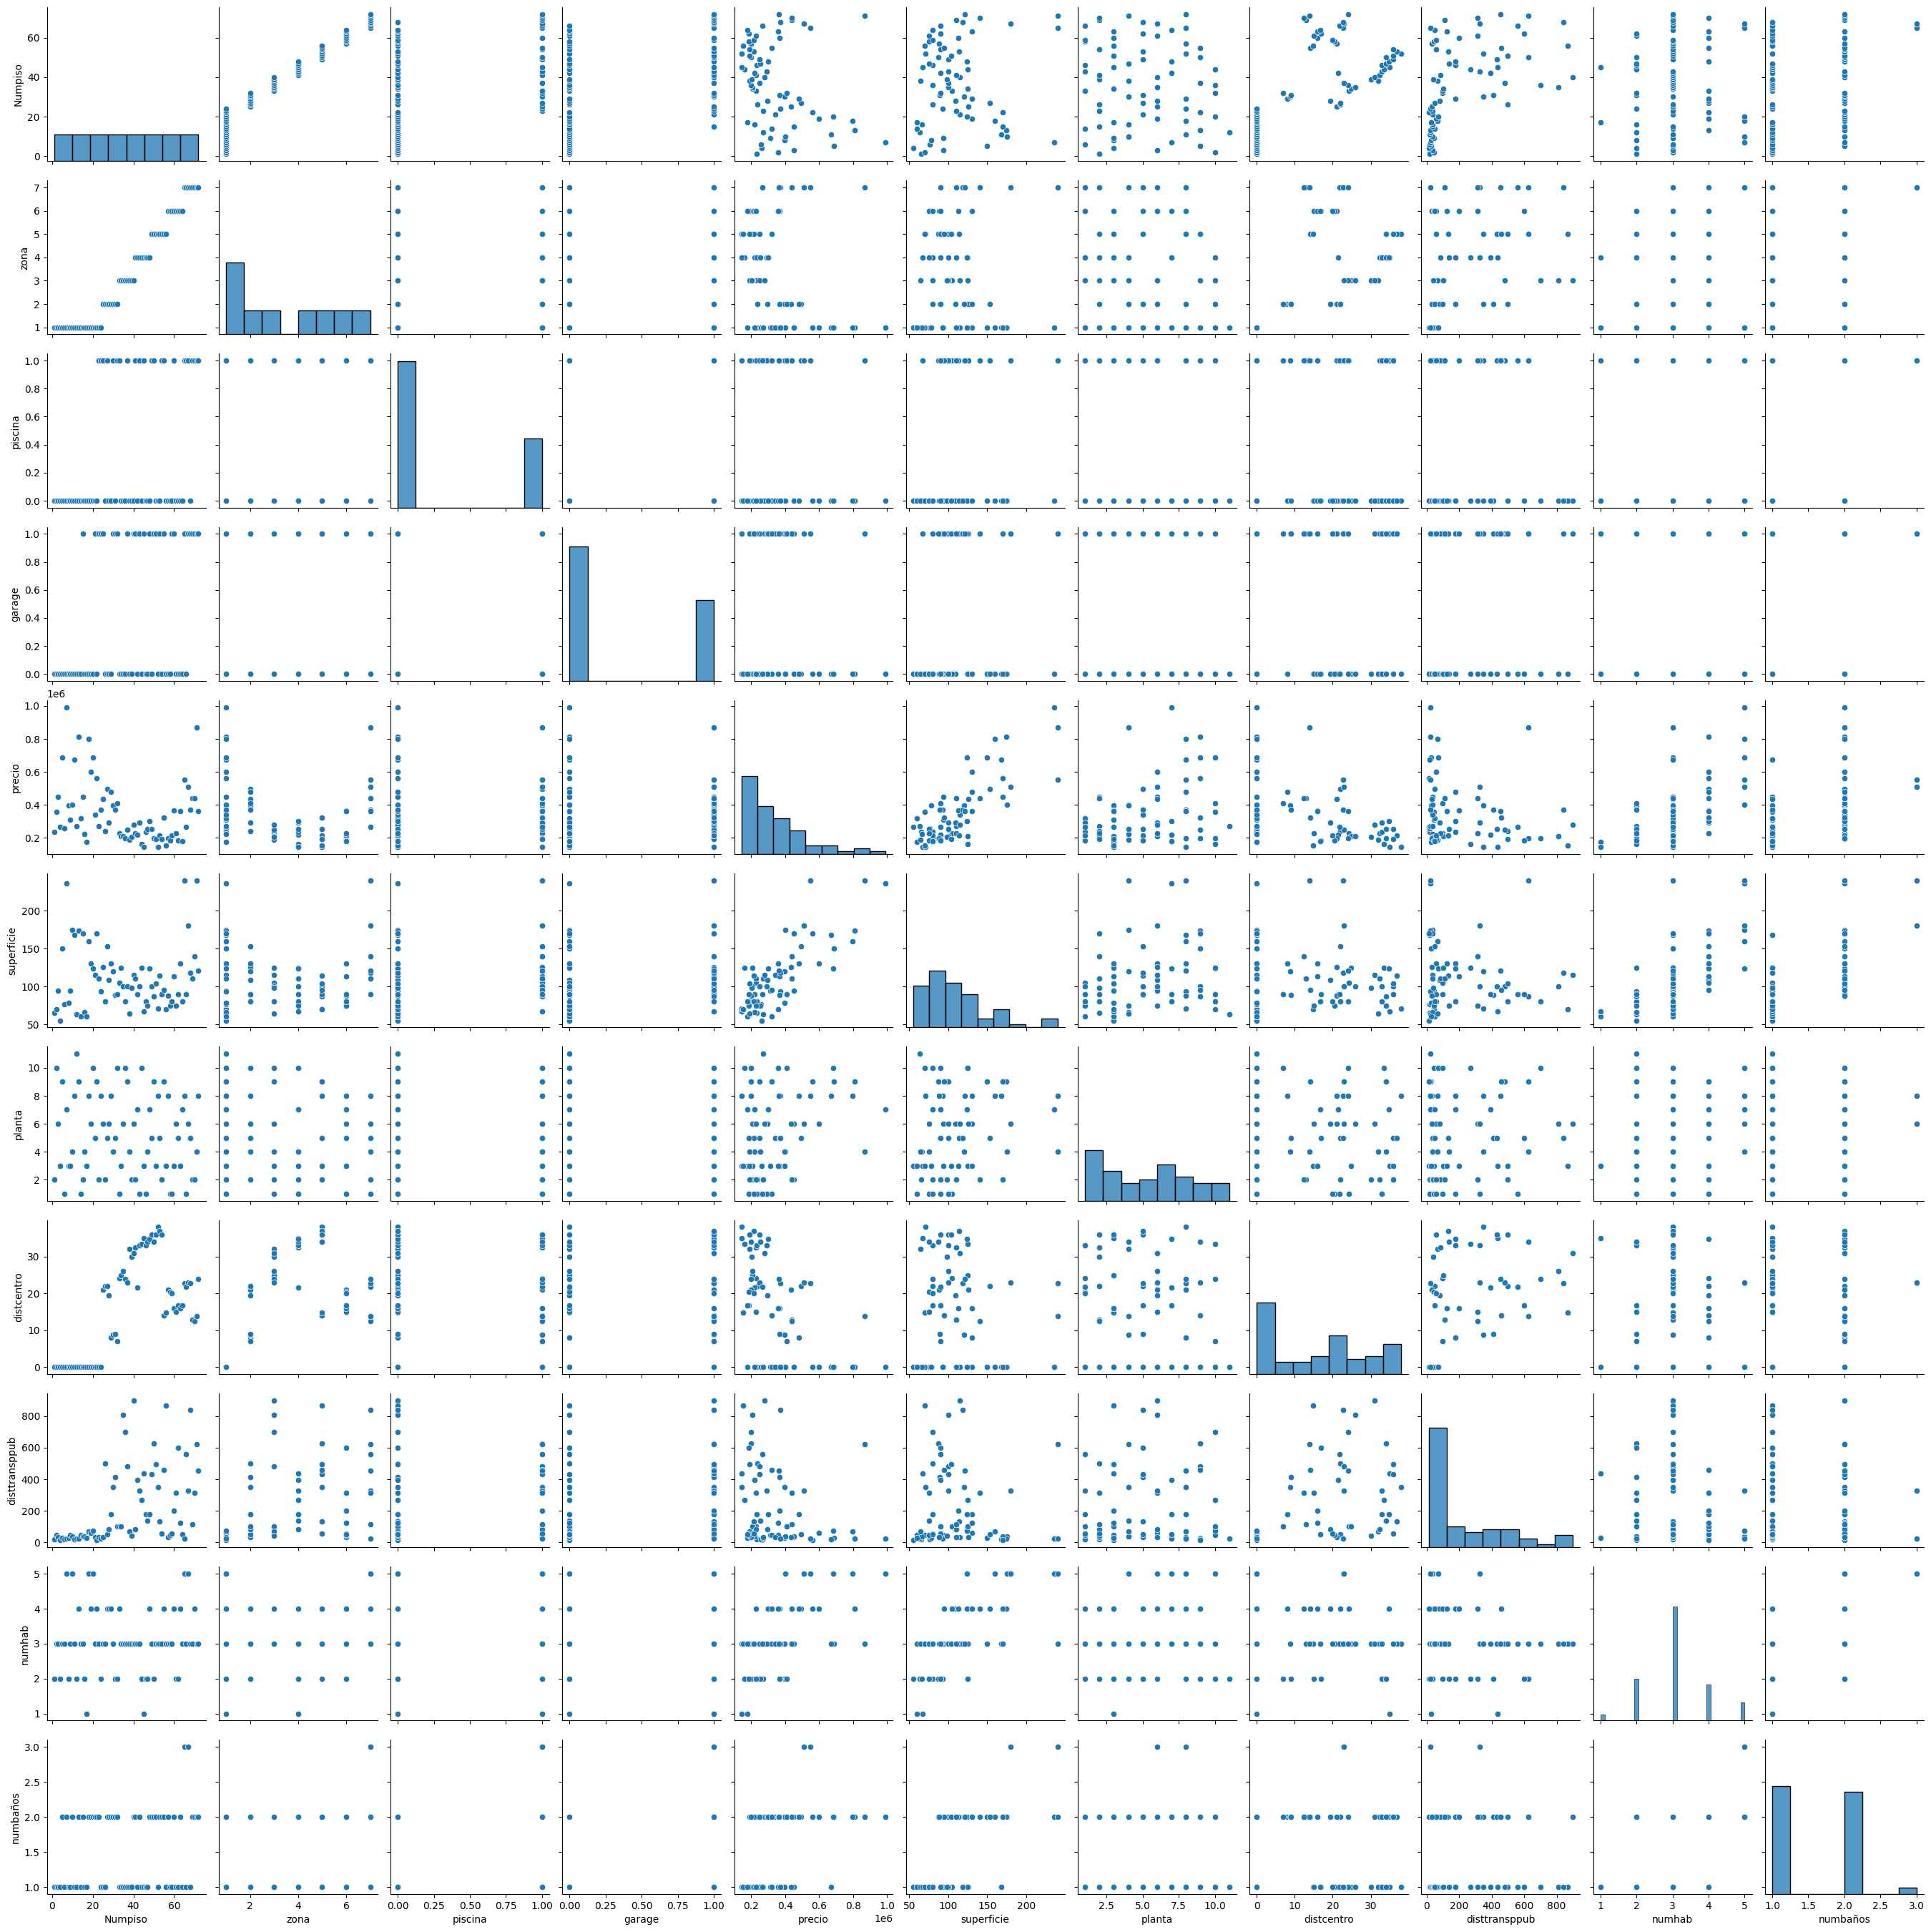

In [12]:
sns.pairplot(ventapisos)

<Axes: >

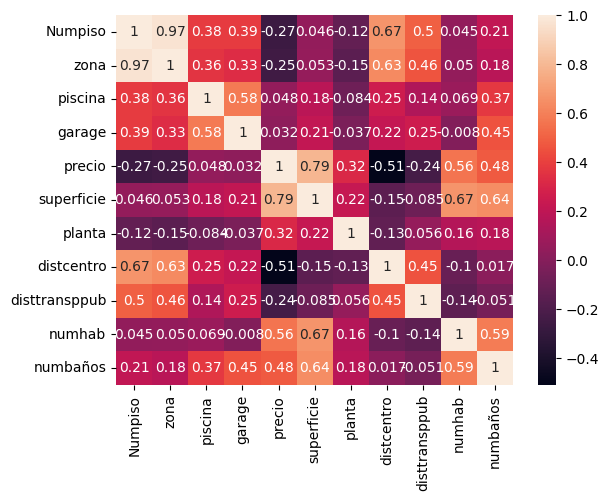

In [13]:
#plt.matshow(df.corr())
sns.heatmap(ventapisos.corr(), annot=True)

Podemos observar las distintas relaciones que existen de correlación entre las distintas variables Xi, de manera que podemos ver por ejemplo que zona está muy correlada con el número de piso, posiblemente debido a que en función de la zona los edificios son más o menos altos en función de la zona. Otra variable que vemos altamente correlada, esta vez de manera inversa es el precio con la distancia al centro, lo cual nos hace ver que a menor distancia al centro mayor es el precio de la vivienda, ya que estamos hablando de una relación inversa.

**b)** Calcula de manera razonada el modelo AS-RLS de Y sobre X1.
 
Interpreta sus parámetros.

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(ventapisos['superficie'], ventapisos['precio'],
                                        ## train_size   = 0.8,
                                        random_state = 1234
                                    )

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     66.54
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           7.19e-11
Time:                        18:14:01   Log-Likelihood:                -705.64
No. Observations:                  54   AIC:                             1415.
Df Residuals:                      52   BIC:                             1419.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        947.7144    4.4e+04      0.022      0.9

No se trata de un ajuste muy bueno, lo podemos ver en valores como la R^2 o el p-valor que son muy baja y muy alto respectivamente. También lo podemos ver en el error que es inusualmente alto.

**c)** Calcula de manera razonada el modelo AS-RLM de Y sobre X1 y X2.

Interpreta sus parámetros.


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(ventapisos[['superficie', 'distcentro']], ventapisos['precio'],
                                        ## train_size   = 0.8,
                                        random_state = 1234
                                    )

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     82.01
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           1.16e-16
Time:                        18:14:01   Log-Likelihood:                -689.04
No. Observations:                  54   AIC:                             1384.
Df Residuals:                      51   BIC:                             1390.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.379e+04   3.56e+04      2.636      0.0

Esta aproximación es notablemente mejor que la anterior, pero de todas formas podemos ver también que el rango de valores es demasiado alto para que pueda sernos útil, así como el error estándar y los valores de la R^2 que se ajustan mejor pero no llegan a un valor que nos guste.

**d)** Calcula de manera razonada el modelo AS-RLM de Y sobre X1 y X3.

Interpreta sus parámetros.

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(ventapisos[['superficie', 'disttransppub']], ventapisos['precio'],
                                        ## train_size   = 0.8,
                                        random_state = 1234
                                    )

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     37.16
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           1.11e-10
Time:                        18:14:01   Log-Likelihood:                -703.62
No. Observations:                  54   AIC:                             1413.
Df Residuals:                      51   BIC:                             1419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.875e+04    4.5e+04      0.639

En este apartado sucede lo mismo que en el apartado **b)**, donde tenemos un R^2 demasiado bajo y unos errores y rango muy altos, así como un p-valor demasiado alto.

**e)** Calcula de manera razonada el modelo AS-RLM de Y sobre X1 y X7.

Interpreta sus parámetros.

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(ventapisos[['superficie', 'Numpiso']], ventapisos['precio'],
                                        ## train_size   = 0.8,
                                        random_state = 1234
                                    )

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     51.19
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           6.39e-13
Time:                        18:14:01   Log-Likelihood:                -698.16
No. Observations:                  54   AIC:                             1402.
Df Residuals:                      51   BIC:                             1408.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.212e+04   4.25e+04      1.697      0.0

Seguimos mejorando respecto al apartado anterior, pero no conseguimos que se trate de un valor bueno pese a todo, su estadístico F es muy alto, así como su error estándar. También podemos ver que su R^2 ajustado no es muy alto, por lo que no nos vale esta hipótesis tampoco.

**f)** Siguiendo las indicaciones de la web https://dataaspirant.com/stepwise-regression/ proporciona el modelo AS-RLM con selección de variables que utilizarías en el futuro.

Interpreta dicho modelo

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(ventapisos[['superficie', 'distcentro']], ventapisos['precio'],
                                        ## train_size   = 0.8,
                                        random_state = 1234
                                    )

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     82.01
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           1.16e-16
Time:                        18:14:01   Log-Likelihood:                -689.04
No. Observations:                  54   AIC:                             1384.
Df Residuals:                      51   BIC:                             1390.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.379e+04   3.56e+04      2.636      0.0

Aquí, habiendo hecho una selección de parámetros más razonada, podemos ver que hay valores mucho más razonables de cara a un ajuste de regresión lineal múltiple. El R^2 es relativamente alto, su p-valor bajo y su error estándar también. Esto nos deja con que es la mejor estimación que hemos hecho hasta la fecha.

**g)** Han llegado dos pisos A y B a INMOCASA con los siguientes valores para las variables:

| | X1 | X2 | X3 | X7 |
|-|----|----|----|----|
| A | 100 | 2 | 200 | 7 |
| B | 300 | 0.5 | 400 | 4 |

Calcula de manera razonada las diferentes predicciones del precio de venta de esos pisos, dando la máxima información posible. 


In [19]:
# X_train = pd.DataFrame({'const': [1.0,1.0], 'superficie': [100,300], 'distcentro': [2,0.5], 'disttransppub': [200,400], 'Numpiso': [7,4]})
X_train = pd.DataFrame({'const': [1.0,1.0], 'superficie': [100,300], 'distcentro': [2,0.5]})
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.935613e+05,17249.917931,358930.595155,4.281919e+05,216187.589711,5.709349e+05
1,1.025647e+06,57431.483387,910348.758357,1.140946e+06,816946.815758,1.234348e+06


Podemos ver que los valores que nos da para las dos casas son:
* A: un valor de casi 400.000€ y un rango de valores [360.000, 433.000]
* B: un valor de 1.000.000€ y un rango de valores [913.944, 1.156.558]
Ambos valores estimados con una probabilidad del 95%.

Esto cualitativamente encaja por lo que hemos visto, ya que el piso A es más pequeño y a mayor distancia del centro, lo cual, según las correlaciones que hemos visto, indicaría un precio menor que el piso B.